# Praca domowa 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.cluster import hierarchy
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
plt.rcParams["figure.figsize"] = [16,9]

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa5/clustering.csv",
                  header=None)

In [3]:
data.columns = ["x", "y"]
data.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


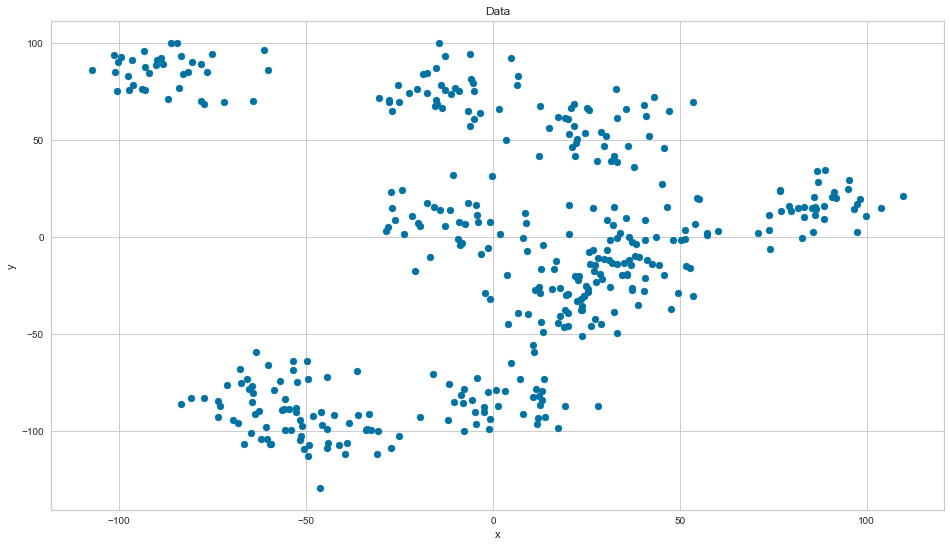

In [4]:
plt.scatter(data["x"], data["y"])
plt.title("Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# nie ma wyraźnych outlierów

## KMeans

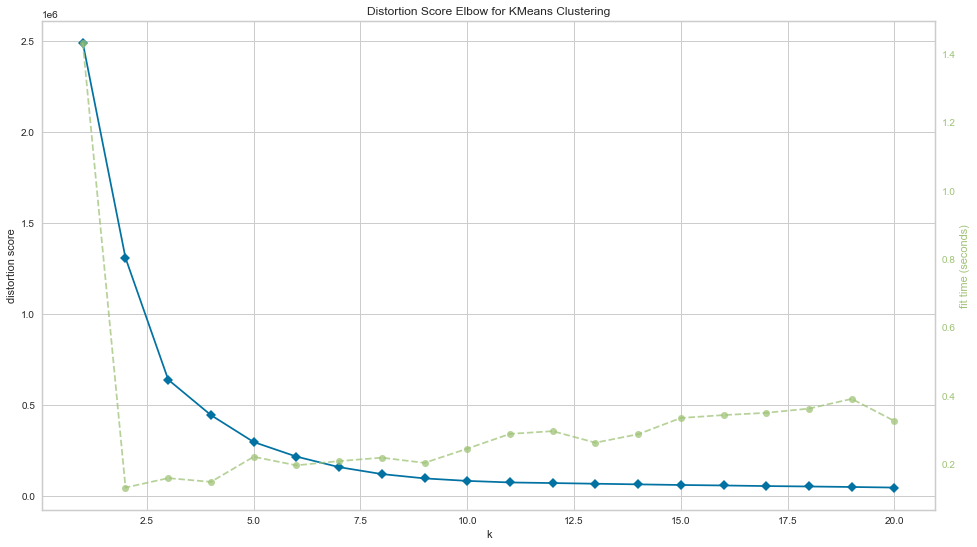

In [5]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,21), locate_elbow=False)
visualizer.fit(data)
visualizer.show()
# disortion - suma kwadratów odległości poszczególnych obserwacji od średniej w ich klastrze
# krzywa jest wygładzona i łokcia nie widać za bardzo

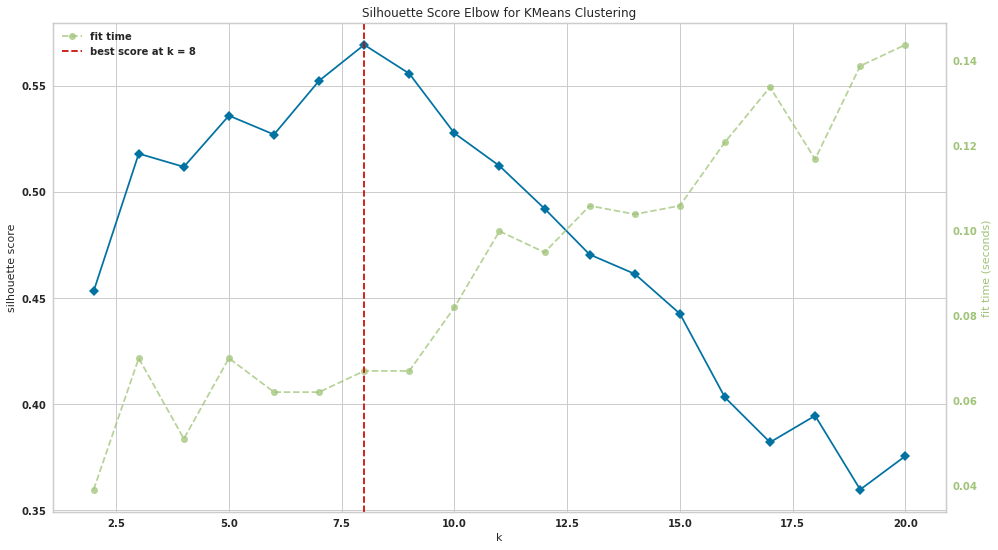

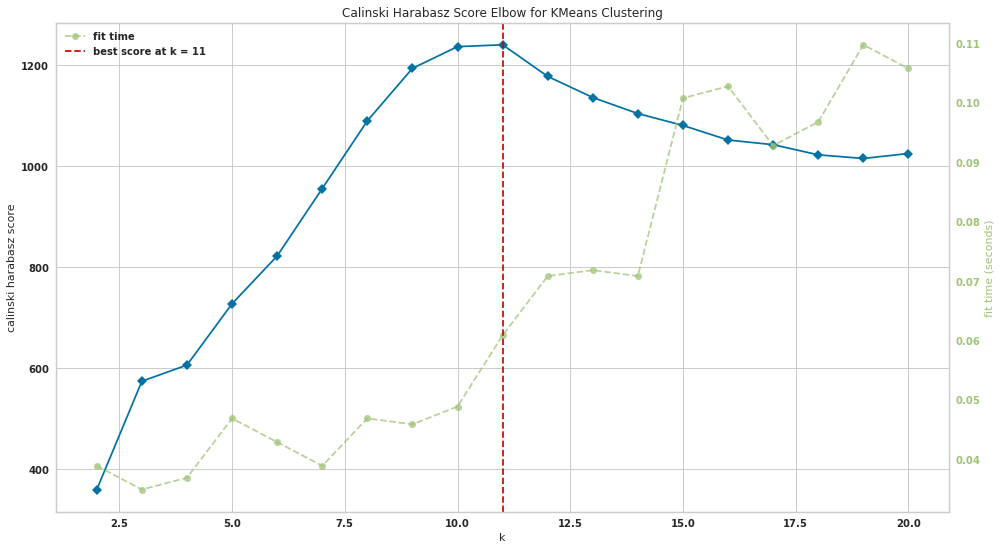

In [42]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(2,21), 
                              metric="silhouette", 
                              locate_elbow=False)
visualizer.fit(data)
plt.axvline(x=8, label='best score at k = {}'.format(8), color="r", linestyle="dashed")
plt.legend()
visualizer.show()

visualizer = KElbowVisualizer(KMeans(random_state=0), k=(2,21), 
                              metric="calinski_harabasz", 
                              locate_elbow=False)
visualizer.fit(data)
plt.axvline(x=11, label='best score at k = {}'.format(11), color="r", linestyle="dashed")
plt.legend()
visualizer.show()

# z poniższych wykresów można wniskować, że
# najlepsza liczba klastrów to 9, bo wtedy osiągane są
# w miarę wysokie wartości indeksów Silhouette oraz Calinskiego-Harabasza

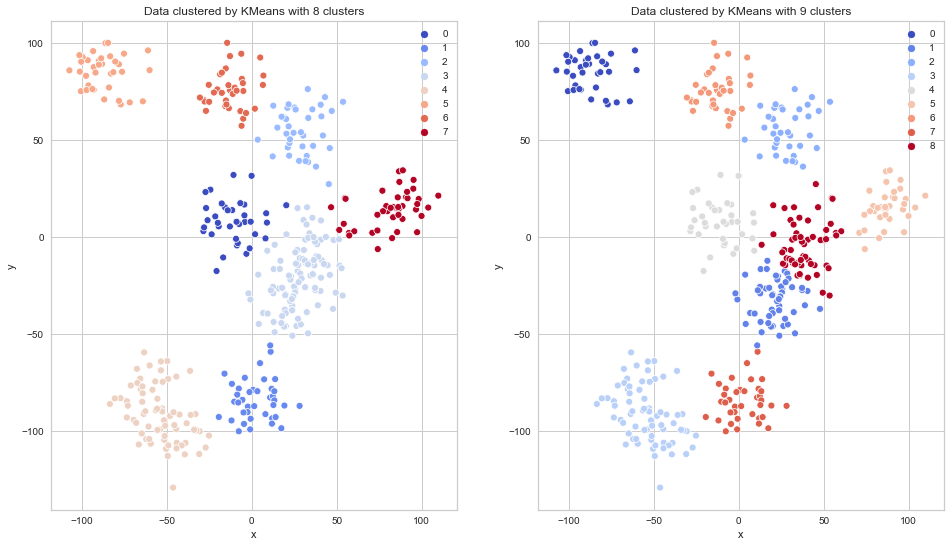

In [18]:
n_clusters = [8, 9]
fig, axes = plt.subplots(1, 2)

for i in range(2):
    kmeans = KMeans(n_clusters=n_clusters[i], random_state=0)
    kmeans.fit(data)
    
    sns.scatterplot(ax=axes[i], x="x", y="y", 
                data=data, 
                hue=kmeans.labels_, 
                legend="full",
               palette="coolwarm")
    axes[i].set_title("Data clustered by KMeans with " + str(n_clusters[i]) + " clusters")

plt.show()

# mimo niższego indeksu C-H podział na 8 klastrów wygląda sensowniej

## AgglomerativeClustering

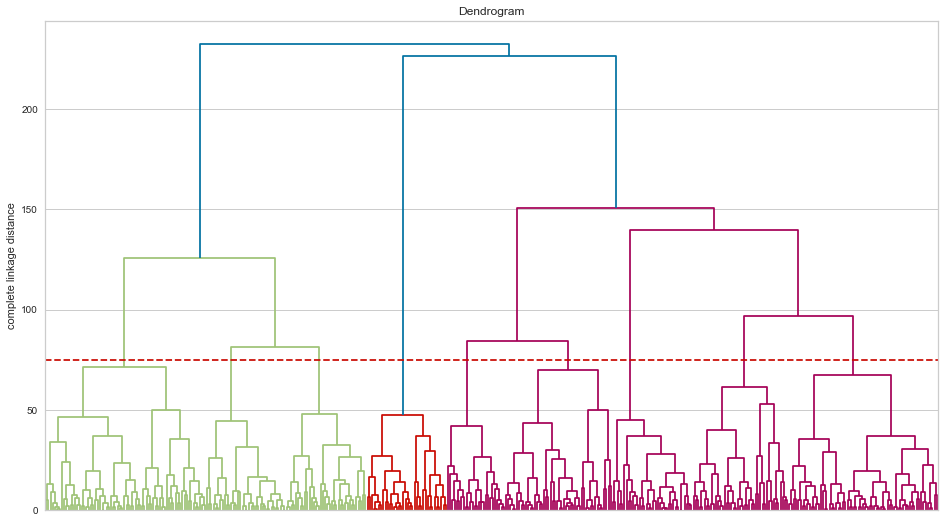

In [7]:
hierarchy.dendrogram(hierarchy.linkage(data, method="complete"), orientation="top")
plt.title("Dendrogram")
plt.axhline(y=75, color="r", linestyle="dashed")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel("complete linkage distance")
plt.show()
# sensownym wydaje się być zaznaczony na rysunku poziom odcięcia,
# co daje podział na 9 klastrów

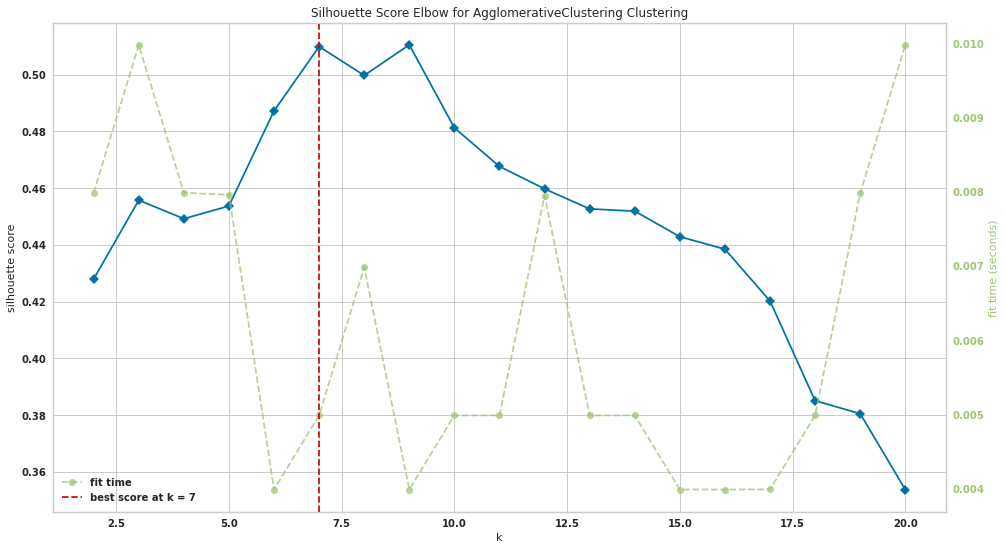

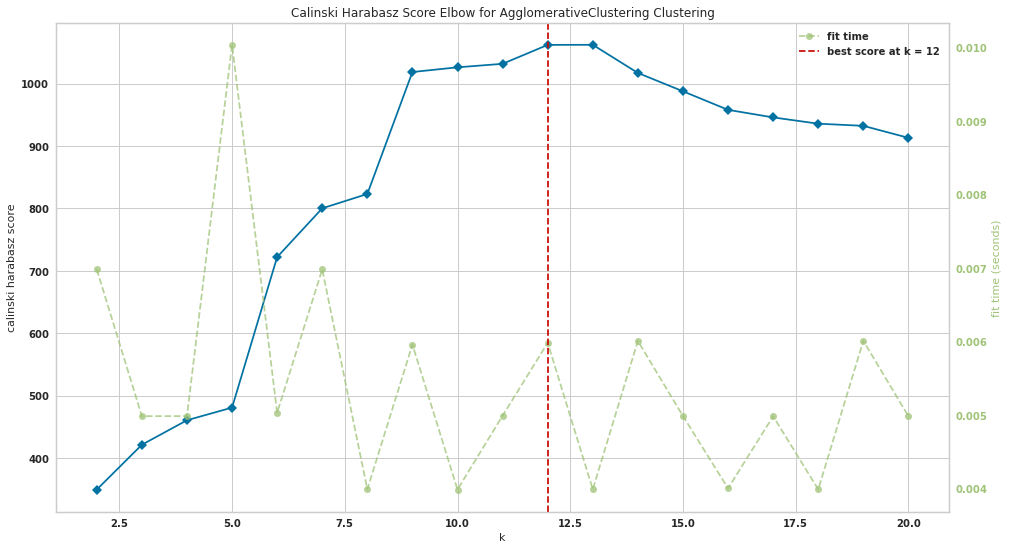

In [55]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage="complete"), 
                              k=(2,21), 
                              metric="silhouette", 
                              locate_elbow=False)
visualizer.fit(data)
plt.axvline(x=7, label='best score at k = {}'.format(7), color="r", linestyle="dashed")
plt.legend()
visualizer.show()

visualizer = KElbowVisualizer(AgglomerativeClustering(linkage="complete"), 
                              k=(2,21), 
                              metric="calinski_harabasz", 
                              locate_elbow=False)
visualizer.fit(data)
plt.axvline(x=12, label='best score at k = {}'.format(12), color="r", linestyle="dashed")
plt.legend()
visualizer.show()
# 8 lub 10 klastrów też dają niezłe wyniki

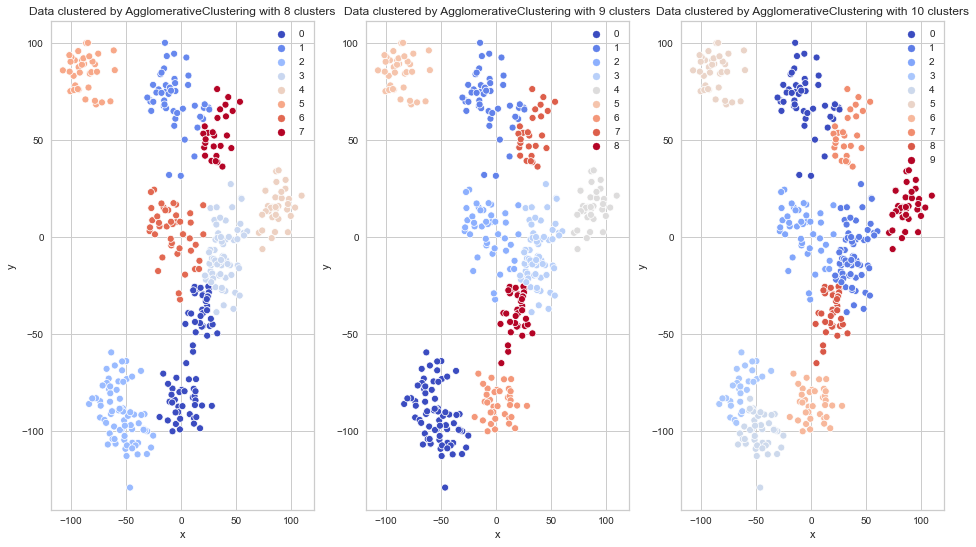

In [15]:
n_clusters = [8, 9, 10]
fig, axes = plt.subplots(1, 3)
for i in range(3):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters[i], linkage="complete")
    agg_clustering.fit(data)
    
    sns.scatterplot(ax=axes[i], x="x", y="y", 
                data=data, 
                hue=agg_clustering.labels_, 
                legend="full",
               palette="coolwarm")
    axes[i].set_title("Data clustered by AgglomerativeClustering with " + 
                      str( n_clusters[i]) + " clusters")
plt.show()
# sytuacja z 9 klastrami wygląda najsensowniej